In [76]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [77]:
data=pd.read_csv("creditcard.csv",names=range(0,31),header=0)

In [78]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.DataFrame(data=data)

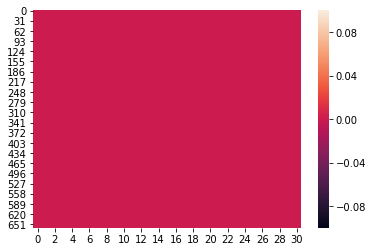

In [81]:
sns.heatmap(df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x2a28633f7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a28633fe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a28633f3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a28634a550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a28634a898>],
 'means': []}

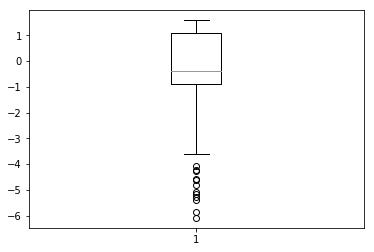

In [82]:
plt.boxplot(df[1])

In [83]:
#from scipy.stats import zscore

In [84]:
#z=np.abs(zscore(df))
#df_new=df[(z<3).all(axis=1)]

In [85]:
df.shape

(662, 31)

In [86]:
#df_new.shape

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score,roc_curve

In [88]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [138]:
lr=LogisticRegression()

In [128]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [129]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       128
           1       0.00      0.00      0.00         5

   micro avg       0.95      0.95      0.95       133
   macro avg       0.48      0.50      0.49       133
weighted avg       0.93      0.95      0.94       133



In [130]:
accuracy_score(y_test,pred)

0.9548872180451128

In [131]:
auc=roc_auc_score(y_test,pred)
auc

0.49609375

In [132]:
fpr,tpr,threshold=roc_curve(y_test,pred)

In [133]:
fpr


array([0.       , 0.0078125, 1.       ])

In [134]:
tpr

array([0., 0., 1.])

In [135]:
threshold

array([2, 1, 0], dtype=int64)

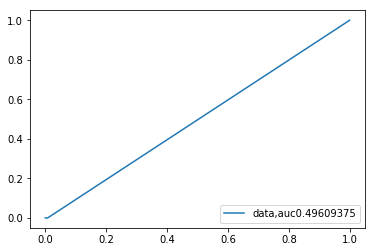

In [136]:
plt.plot(fpr,tpr,label="data,auc"+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc=DecisionTreeClassifier()

In [37]:
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
auc=roc_auc_score(y_test,preddtc)
print(auc)

0.8995433789954338
0.5269549763033176


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf=RandomForestClassifier()

In [41]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9841986455981941

In [42]:
predrf=rf.predict(x_test)

In [44]:
accuracy_score(y_test,predrf)

0.9634703196347032

In [45]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       211
           1       0.00      0.00      0.00         8

   micro avg       0.96      0.96      0.96       219
   macro avg       0.48      0.50      0.49       219
weighted avg       0.93      0.96      0.95       219



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbc=GradientBoostingClassifier()

In [49]:
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

1.0

In [50]:
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))

0.958904109589041


In [51]:
!pip install xgboost

In [55]:
from xgboost import XGBClassifier

In [57]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

1.0

In [58]:
predxg=xgb.predict(x_test)
accuracy_score(y_test,predxg)

0.9680365296803652

In [59]:
from sklearn.model_selection import cross_val_score

In [64]:
#mod=["LogisticRegression()","RandomForestClassifier()","DecisionTreeClassifier()","XGBClassifier()"]

XGBOOST is the best model where we get best accuracy score

In [67]:
import pickle

In [68]:
saved_model=pickle.dumps(xgb)

In [70]:
load_model=pickle.loads(saved_model)

In [71]:
load_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [72]:
from sklearn.externals import joblib

In [73]:
joblib.dump(xgb,"exgb")

['exgb']

In [74]:
xgbjoblib=joblib.load("exgb")

In [75]:
xgbjoblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)